# 一 预处理
## 1.1 加载数据


In [1]:
import pandas as pd

file='./event.csv'

csv_data=pd.read_csv(file, encoding='gb18030') # 编码


csv_data.head()   #显示前5行数据





,事件接收时间,事件等级,事件类型,设备IP地址,设备类型,源IP地址,目的IP地址,事件名称,用户名称,源端口,...,备用长整形3,备用长整形4,备用长整形5,备用长整形6,备用字符串7,备用字符串8,备用字符串9,备用字符串10,备用字符串11,备用字符串12
0,2019-09-19 16:28:30,一般,/网络访问,172.18.15.98,/安全设备/入侵防御,172.30.83.49,192.168.1.100,入侵日志（IPS）,NaN,55442,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-09-19 11:53:50,一般,/网络访问,172.18.15.58,/安全设备/入侵防御,172.29.254.250,192.168.1.1,入侵日志（IPS）,NaN,48918,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-09-19 12:14:51,重要,/攻击入侵/SQL注入,10.140.94.9,/安全设备/入侵防御,10.192.219.34,10.141.4.116,Web服务远程SQL注入攻击可疑行为,,57095,...,0,0,0,0,,,,,,
3,2019-09-19 18:32:07,严重,/攻击入侵/漏洞利用,172.18.250.221,/安全设备/入侵防御,123.126.45.75,172.17.14.168,R1_外网设备_目标服务器flash配置文件存在不安全配置,NaN,80,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-09-19 16:03:02,重要,/攻击入侵/漏洞利用,10.141.118.56,/安全设备/入侵防御,,,Apache Shiro 反序列化漏洞,NaN,4138,...,0,0,0,0,,,,,,


In [2]:
csv_data.info()        #查看各字段的信息

csv_data.shape     #查看数据集行列分布，几行几列

csv_data.describe()  #查看数据的大体情况

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99809 entries, 0 to 99808
Data columns (total 66 columns):
事件接收时间      99809 non-null object
事件等级        99809 non-null object
事件类型        99809 non-null object
设备IP地址      99809 non-null object
设备类型        99809 non-null object
源IP地址       98923 non-null object
目的IP地址      99485 non-null object
事件名称        99809 non-null object
用户名称        29102 non-null object
源端口         99809 non-null int64
目的端口        99809 non-null int64
操作          73463 non-null object
结果          99640 non-null object
对象          0 non-null float64
持续时间        0 non-null float64
响应          99809 non-null object
发送流量        99809 non-null int64
接收流量        99809 non-null int64
事件归并数目      99809 non-null int64
事件内容摘要      87741 non-null object
事件采集类型      99809 non-null object
事件原始等级      99246 non-null object
事件原始类型      88745 non-null object
事件产生时间      99809 non-null object
监控数值        99809 non-null float64
网络协议        99809 non-null object
网络应用协议      99809

,源端口,目的端口,对象,持续时间,发送流量,接收流量,事件归并数目,监控数值,源转换端口,目的转换端口,...,备用双精度1,备用双精度2,备用整形3,备用整形4,备用整形5,备用整形6,备用长整形3,备用长整形4,备用长整形5,备用长整形6
count,99809.000000,99809.000000,0.0,0.0,99809.000000,99809.000000,99809.0,99809.0,99809.000000,99809.0,...,99809.0,99809.0,99809.0,99809.0,99809.0,99809.0,99809.0,99809.0,99809.0,99809.0
mean,33413.855264,10577.969832,NaN,NaN,3.517709,3.573846,1.0,0.0,93.510144,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,25805.984273,19456.277854,NaN,NaN,217.963810,220.570859,0.0,0.0,2116.285373,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,NaN,NaN,0.000000,0.000000,1.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,3088.000000,80.000000,NaN,NaN,0.000000,0.000000,1.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,49269.000000,139.000000,NaN,NaN,0.000000,0.000000,1.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,56716.000000,8080.000000,NaN,NaN,0.000000,0.000000,1.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,65534.000000,65524.000000,NaN,NaN,22896.000000,22840.000000,1.0,0.0,60918.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 1.2 统计分析

In [3]:
# label 

label=csv_data['事件类型']  #Name: 事件类型, Length: 99809, dtype: object

uni=label.unique()  #<class 'numpy.ndarray'>
print(uni)
print(len(uni))

['/网络访问' '/攻击入侵/SQL注入' '/攻击入侵/漏洞利用' '/攻击入侵' '/攻击入侵/XSS注入' '/信息监控' '/信息刺探'
 '/系统状态/运行报告' '/认证授权' '/信息刺探/漏洞扫描' '/恶意代码' '/系统状态' '/其它分类' '/安全预警'
 '/攻击入侵/拒绝服务' '/攻击入侵/口令猜测' '/恶意代码/网络蠕虫' '/攻击入侵/后门攻击']
18


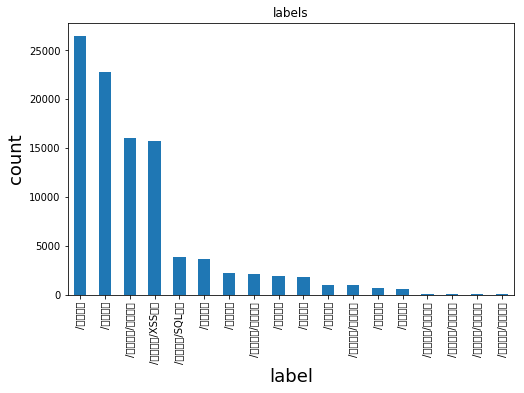

In [20]:
import matplotlib.pyplot as plt

df=csv_data
d = {'label':df['事件类型'].value_counts().index, 'count': df['事件类型'].value_counts()}
df_label = pd.DataFrame(data=d).reset_index(drop=True)

df_label.plot(x='label', y='count', kind='bar', legend=False,  figsize=(8, 5))
plt.title("labels")
plt.ylabel('count', fontsize=18)
plt.xlabel('label', fontsize=18)
plt.show()

In [17]:
print(csv_data['目的端口'].value_counts())  #统计某一列中各个元素值出现的次数
print("Skewness: %f" % (csv_data['目的端口'].skew()))#列出数据的偏斜度
print("Kurtosis: %f" % (csv_data['目的端口'].kurt()))#列出数据的峰度

for index, row in csv_data.iteritems():
    print(csv_data[index].value_counts())  #统计某一列中各个元素值出现的次数
    print("Skewness: %f" % (csv_data[index].skew()))#列出数据的偏斜度
    print("Kurtosis: %f" % (csv_data[index].kurt()))#列出数据的峰度


80       38222
8080     12677
0         8934
7002      4792
161       4089
54321     1735
139       1393
61616     1162
57110      998
2048       899
3389       868
3306       841
22         625
53         546
57103      388
12747      387
15026      374
31589      329
5565       328
5559       318
54659      316
54637      316
5564       306
31433      295
5560       293
65186      290
8090       284
50001      259
445        238
5555       238
         ...  
50058        1
49192        1
53896        1
18872        1
64046        1
50153        1
54507        1
25981        1
50441        1
64012        1
3822         1
24479        1
2798         1
60873        1
51446        1
2837         1
2542         1
60041        1
8656         1
19110        1
52022        1
49867        1
49356        1
50827        1
54921        1
3666         1
56648        1
58547        1
35778        1
36640        1
Name: 目的端口, Length: 1788, dtype: int64
Skewness: 1.894481
Kurtosis: 1.900973


In [12]:
# 整体相关系数
#csv_data['目的端口'].corr(csv_data['源端口'])         #计算两个列的相关度

# 结果很多 NaN，原因2：str 无法计算 相关系数; 某一列值都相同则无法计算
# 待 下一步处理

# spearman 相关系数的系数，范围。适合等 在文档中百度

csv_data.corr('spearman')


,源端口,目的端口,对象,持续时间,发送流量,接收流量,事件归并数目,监控数值,源转换端口,目的转换端口,...,备用双精度1,备用双精度2,备用整形3,备用整形4,备用整形5,备用整形6,备用长整形3,备用长整形4,备用长整形5,备用长整形6
源端口,1.000000,0.237032,NaN,NaN,-0.034772,-0.034772,NaN,NaN,0.008920,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
目的端口,0.237032,1.000000,NaN,NaN,-0.035662,-0.035662,NaN,NaN,0.049079,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
对象,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
持续时间,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
发送流量,-0.034772,-0.035662,NaN,NaN,1.000000,1.000000,NaN,NaN,-0.000985,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
接收流量,-0.034772,-0.035662,NaN,NaN,1.000000,1.000000,NaN,NaN,-0.000985,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
事件归并数目,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
监控数值,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
源转换端口,0.008920,0.049079,NaN,NaN,-0.000985,-0.000985,NaN,NaN,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
目的转换端口,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 1.3 缺失数据分析

In [34]:
csv_data.isnull()


,事件接收时间,事件等级,事件类型,设备IP地址,设备类型,源IP地址,目的IP地址,事件名称,用户名称,源端口,...,备用长整形3,备用长整形4,备用长整形5,备用长整形6,备用字符串7,备用字符串8,备用字符串9,备用字符串10,备用字符串11,备用字符串12
0,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,True,True,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,True,True,True,True,True,True
6,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,True,True,True,True,True,True
7,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,True,True,True,True,True,True
8,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,True,True,True,True,True,True
9,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,True,True,True,True,True,True


In [9]:
#csv_data.isnull().any()
missing=csv_data.columns[csv_data.isnull().any()].tolist()  
missing

['源IP地址',
 '目的IP地址',
 '用户名称',
 '操作',
 '结果',
 '对象',
 '持续时间',
 '事件内容摘要',
 '事件原始等级',
 '事件原始类型',
 '源转换IP地址',
 '源名称',
 '源MAC地址',
 '目的名称',
 '目的MAC地址',
 '目的转换IP地址',
 '设备名称',
 '程序名称',
 '请求内容',
 '备用字符串3',
 '备用字符串4',
 '备用字符串5',
 '备用字符串6',
 '备用字符串7',
 '备用字符串8',
 '备用字符串9',
 '备用字符串10',
 '备用字符串11',
 '备用字符串12']

In [35]:
csv_data[missing].isnull().sum()
# 可见 对象 持续时间两列全都为 null   99809

源IP地址         886
目的IP地址        324
用户名称        70707
操作          26346
结果            169
对象          99809
持续时间        99809
事件内容摘要      12068
事件原始等级        563
事件原始类型      11064
源转换IP地址     54259
源名称         43195
源MAC地址      52482
目的名称        53696
目的MAC地址     52482
目的转换IP地址    54259
设备名称        11541
程序名称        94463
请求内容        45988
备用字符串3      54259
备用字符串4      50741
备用字符串5      53122
备用字符串6      53123
备用字符串7      54259
备用字符串8      53131
备用字符串9      53123
备用字符串10     53812
备用字符串11     53123
备用字符串12     54259
dtype: int64

## 1.4 缺失值处理（填充）

In [36]:
# 判断是 object类型，可能出现NaN，同时object可能出现不是NaN但是没有显示
#打印出含NaN的列
# 除了 全空的 对象，持续时间，其他的都是object
for index, row in csv_data.iteritems():
    a=csv_data[index]
    if a.isnull().sum()>0:
        print(index)
        print(a.dtype)

源IP地址
object
目的IP地址
object
用户名称
object
操作
object
结果
object
对象
float64
持续时间
float64
事件内容摘要
object
事件原始等级
object
事件原始类型
object
源转换IP地址
object
源名称
object
源MAC地址
object
目的名称
object
目的MAC地址
object
目的转换IP地址
object
设备名称
object
程序名称
object
请求内容
object
备用字符串3
object
备用字符串4
object
备用字符串5
object
备用字符串6
object
备用字符串7
object
备用字符串8
object
备用字符串9
object
备用字符串10
object
备用字符串11
object
备用字符串12
object


In [4]:
#注意区分 object 类型和float，int

import numpy as np

data=csv_data
temp=data
for index, row in data.iteritems():
    if temp[index].dtype==object:
        temp[index]=temp[index].fillna('0')
    else:
        temp[index]=temp[index].fillna(0)
temp

,事件接收时间,事件等级,事件类型,设备IP地址,设备类型,源IP地址,目的IP地址,事件名称,用户名称,源端口,...,备用长整形3,备用长整形4,备用长整形5,备用长整形6,备用字符串7,备用字符串8,备用字符串9,备用字符串10,备用字符串11,备用字符串12
0,2019-09-19 16:28:30,一般,/网络访问,172.18.15.98,/安全设备/入侵防御,172.30.83.49,192.168.1.100,入侵日志（IPS）,0,55442,...,0,0,0,0,0,0,0,0,0,0
1,2019-09-19 11:53:50,一般,/网络访问,172.18.15.58,/安全设备/入侵防御,172.29.254.250,192.168.1.1,入侵日志（IPS）,0,48918,...,0,0,0,0,0,0,0,0,0,0
2,2019-09-19 12:14:51,重要,/攻击入侵/SQL注入,10.140.94.9,/安全设备/入侵防御,10.192.219.34,10.141.4.116,Web服务远程SQL注入攻击可疑行为,,57095,...,0,0,0,0,,,,,,
3,2019-09-19 18:32:07,严重,/攻击入侵/漏洞利用,172.18.250.221,/安全设备/入侵防御,123.126.45.75,172.17.14.168,R1_外网设备_目标服务器flash配置文件存在不安全配置,0,80,...,0,0,0,0,0,0,0,0,0,0
4,2019-09-19 16:03:02,重要,/攻击入侵/漏洞利用,10.141.118.56,/安全设备/入侵防御,,,Apache Shiro 反序列化漏洞,0,4138,...,0,0,0,0,,,,,,
5,2019-09-19 12:01:25,一般,/网络访问,172.18.15.2,/安全设备/入侵防御,172.16.2.51,10.192.34.253,入侵日志（IPS）,0,50725,...,0,0,0,0,0,0,0,0,0,0
6,2019-09-19 21:20:37,重要,/攻击入侵,10.141.249.138,/安全设备/Web应用安全网关,10.1.144.74,10.141.2.54,远程文件包含,0,38463,...,0,0,0,0,0,0,0,0,0,0
7,2019-09-19 21:20:37,重要,/攻击入侵,10.141.249.138,/安全设备/Web应用安全网关,10.1.144.74,10.141.2.54,远程文件包含,0,38463,...,0,0,0,0,0,0,0,0,0,0
8,2019-09-19 15:03:31,轻微,/攻击入侵,10.158.166.15,/安全设备/入侵防御,10.141.186.38,10.141.186.227,SNMP操作使用弱口令,0,55074,...,0,0,0,0,0,0,0,0,0,0
9,2019-09-19 21:20:37,重要,/攻击入侵,10.141.249.138,/安全设备/Web应用安全网关,10.1.144.74,10.141.2.54,远程文件包含,0,32359,...,0,0,0,0,0,0,0,0,0,0


In [37]:
# 有一些  看不到的数据，比如 temp['源ip地址'][4]  是 空的
#判断是空格，检验
if temp['源IP地址'][4]==' ':
     print("x")
if temp['备用字符串7'][2]==' ':
     print("y")

x
y


## 1.5 编码

上面得到的数据集有很多 object（str），模型很难识别。故需要编码为数字。

原数据 99809*66*8/1024/1024  约等于50mb
内存限制 4gb
若使用onehot 编码，需要限制 4gb/50mb=80，最多扩充80*66-66 列。
但是经过分析原数据很复杂，onehot编码必然超出内存限制

并且得到的会时非常稀疏的矩阵，效率很低
下面举例

In [39]:
#凭经验去掉一些列，其他列onehot编码

pdata=csv_data.drop(['对象','持续时间','设备IP地址','事件接收时间','源IP地址','目的IP地址','采集器IP地址',
                    '事件原始内容','事件内容摘要','事件产生时间'],axis=1)

ptemp=pdata
for index, row in pdata.iteritems():
    if ptemp[index].dtype==object:
        ptemp[index]=ptemp[index].fillna('0')
    else:
        ptemp[index]=ptemp[index].fillna(0)

from sklearn import preprocessing

enc=preprocessing.OneHotEncoder(categorical_features='all')
enc.fit(ptemp)

ans=enc.transform(ptemp).toarray() #直接  toarray()   MemoryError:   99809x29205
ans

F:\Anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:382: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. The passed value of 'all' is the default and can simply be removed.
  DeprecationWarning)


MemoryError: 

经过考虑，采用  pandas.factorize 编码


In [5]:
import numpy as np


for index, row in data.iteritems():
    if temp[index].dtype==object:
        temp[index] = pd.factorize(data[index])[0].astype(np.uint16)

temp


,事件接收时间,事件等级,事件类型,设备IP地址,设备类型,源IP地址,目的IP地址,事件名称,用户名称,源端口,...,备用长整形3,备用长整形4,备用长整形5,备用长整形6,备用字符串7,备用字符串8,备用字符串9,备用字符串10,备用字符串11,备用字符串12
0,0,0,0,0,0,0,0,0,0,55442,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,1,1,0,0,48918,...,0,0,0,0,0,0,0,0,0,0
2,2,1,1,2,0,2,2,1,1,57095,...,0,0,0,0,1,1,1,1,1,1
3,3,2,2,3,0,3,3,2,0,80,...,0,0,0,0,0,0,0,0,0,0
4,4,1,2,4,0,4,4,3,0,4138,...,0,0,0,0,1,1,1,1,1,1
5,5,0,0,5,0,5,5,0,0,50725,...,0,0,0,0,0,0,0,0,0,0
6,6,1,3,6,1,6,6,4,0,38463,...,0,0,0,0,0,0,0,0,0,0
7,6,1,3,6,1,6,6,4,0,38463,...,0,0,0,0,0,0,0,0,0,0
8,7,3,3,7,0,7,7,5,0,55074,...,0,0,0,0,0,0,0,0,0,0
9,6,1,3,6,1,6,6,4,0,32359,...,0,0,0,0,0,0,0,0,0,0


为了方便处理，都转化为 float
转化后 各列特征，均为数字。
计算各列相关性
由于某列各值都相同的话，编码都为0，相关性计算无法计算，为NaN，先处理掉

In [7]:
df=temp.astype("float64")

tp=df

for index, row in tp.iteritems():
    if temp[index].value_counts().shape[0]==1: #    if temp[index].sum()==0: 优化
        print(index)
        df=df.drop([index],axis=1)
        
#下面的列 （特征）  都没有参考价值

对象
持续时间
事件归并数目
事件采集类型
监控数值
目的转换端口
备用整形2
备用长整形1
备用长整形2
备用双精度1
备用双精度2
备用整形3
备用整形4
备用整形5
备用整形6
备用长整形3
备用长整形4
备用长整形5
备用长整形6


In [ ]:
计算相关性并检查还有没有其他问题

In [6]:
tp=df.corr("pearson")
tp

,事件接收时间,事件等级,事件类型,设备IP地址,设备类型,源IP地址,目的IP地址,事件名称,用户名称,源端口,...,备用字符串3,备用字符串4,备用字符串5,备用字符串6,备用字符串7,备用字符串8,备用字符串9,备用字符串10,备用字符串11,备用字符串12
事件接收时间,1.000000,0.161324,0.128843,0.095042,0.129359,0.231154,-0.044794,0.082559,0.199781,-0.121742,...,0.237158,0.214045,0.239891,0.032137,0.290066,-0.025172,-0.022551,-0.030144,0.240653,0.290066
事件等级,0.161324,1.000000,0.062593,0.043445,0.156958,-0.015424,-0.035259,0.110983,-0.107514,-0.017382,...,0.109185,0.151901,0.116930,0.003871,0.149461,-0.011935,-0.013289,-0.020540,0.117361,0.149461
事件类型,0.128843,0.062593,1.000000,0.310422,0.222768,0.176470,0.080290,0.469914,0.224909,-0.242966,...,0.057639,0.063964,0.194472,0.277060,0.063559,0.188557,0.166539,0.172117,0.193861,0.063559
设备IP地址,0.095042,0.043445,0.310422,1.000000,-0.128457,0.297911,0.120603,0.351322,0.322601,-0.069004,...,0.190244,0.194339,0.276121,0.188265,0.229575,0.098906,0.085725,0.083413,0.275747,0.229575
设备类型,0.129359,0.156958,0.222768,-0.128457,1.000000,-0.018374,-0.174344,-0.048155,-0.194259,-0.046472,...,-0.212766,-0.282556,-0.189070,0.090403,-0.306495,0.113927,0.104550,0.113458,-0.189963,-0.306495
源IP地址,0.231154,-0.015424,0.176470,0.297911,-0.018374,1.000000,-0.106740,0.096692,0.324894,0.084693,...,0.164782,0.087017,0.243317,0.152050,0.216984,0.135721,0.098368,0.121140,0.243299,0.216984
目的IP地址,-0.044794,-0.035259,0.080290,0.120603,-0.174344,-0.106740,1.000000,0.108677,0.038695,-0.126099,...,-0.077677,-0.089658,-0.105700,-0.066486,-0.091845,-0.033212,-0.028636,-0.027560,-0.105712,-0.091845
事件名称,0.082559,0.110983,0.469914,0.351322,-0.048155,0.096692,0.108677,1.000000,0.111456,-0.162859,...,0.102699,0.347642,0.131152,0.112380,0.094039,0.067208,0.060148,0.055465,0.130892,0.094039
用户名称,0.199781,-0.107514,0.224909,0.322601,-0.194259,0.324894,0.038695,0.111456,1.000000,-0.068355,...,0.565563,0.439447,0.638703,0.188545,0.700200,0.024083,0.014323,0.000700,0.639955,0.700200
源端口,-0.121742,-0.017382,-0.242966,-0.069004,-0.046472,0.084693,-0.126099,-0.162859,-0.068355,1.000000,...,-0.105941,-0.137851,-0.095424,-0.008922,-0.116415,-0.000177,0.004026,0.005315,-0.095603,-0.116415


In [59]:
# 由于是 特征*特征矩阵，若有一列出现问题全为NaN会导致各列都含NaN。故采用 sum()>1而不是sum()>0
# for index, row in tp.iteritems():
#     if tp[index].isnull().sum()>1:
#         print(index)
tp.isnull().any()

事件接收时间      False
事件等级        False
事件类型        False
设备IP地址      False
设备类型        False
源IP地址       False
目的IP地址      False
事件名称        False
用户名称        False
源端口         False
目的端口        False
操作          False
结果          False
响应          False
发送流量        False
接收流量        False
事件内容摘要      False
事件原始等级      False
事件原始类型      False
事件产生时间      False
网络协议        False
网络应用协议      False
源转换IP地址     False
源名称         False
源MAC地址      False
源转换端口       False
目的名称        False
目的MAC地址     False
目的转换IP地址    False
设备名称        False
程序名称        False
采集器IP地址     False
请求内容        False
事件原始内容      False
日志类型        False
备用字符串1      False
备用字符串2      False
备用字符串3      False
备用字符串4      False
备用字符串5      False
备用字符串6      False
备用字符串7      False
备用字符串8      False
备用字符串9      False
备用字符串10     False
备用字符串11     False
备用字符串12     False
dtype: bool

## 1.5 数据标准化

这里先不采用。


原因：比如逻辑回归中采取下列标准化，准确率召回率低于 10%

sc = StandardScaler()
sc.fit(x_train)  # 计算均值和方差
x_train_std = sc.transform(x_train) #利用计算好的方差和均值进行Z分数标准化
x_test_std = sc.transform(x_test)   #这里不合适。采用了之后准确率召回率低于 10%

一、标准化（Z-Score），或者去除均值和方差缩放
公式为：(X-mean)/std  计算时对每个属性/每列分别进行。

将数据按期属性（按列进行）减去其均值，并处以其方差。得到的结果是，对于每个属性/每列来说所有数据都聚集在0附近，方差为1。

实现时，有两种不同的方式：

使用sklearn.preprocessing.scale()函数，可以直接将给定数据进行标准化。
二、将属性缩放到一个指定范围
除了上述介绍的方法之外，另一种常用的方法是将属性缩放到一个指定的最大和最小值（通常是1-0）之间，这可以通过preprocessing.MinMaxScaler类实现。

使用这种方法的目的包括：

1、对于方差非常小的属性可以增强其稳定性。

2、维持稀疏矩阵中为0的条目。

三、正则化（Normalization）
正则化的过程是将每个样本缩放到单位范数（每个样本的范数为1），如果后面要使用如二次型（点积）或者其它核方法计算两个样本之间的相似性这个方法会很有用。

Normalization主要思想是对每个样本计算其p-范数，然后对该样本中每个元素除以该范数，这样处理的结果是使得每个处理后样本的p-范数（l1-norm,l2-norm）等于1。

             p-范数的计算公式：||X||p=(|x1|^p+|x2|^p+...+|xn|^p)^1/p
该方法主要应用于文本分类和聚类中。例如，对于两个TF-IDF向量的l2-norm进行点积，就可以得到这两个向量的余弦相似性。

1、可以使用preprocessing.normalize()函数对指定数据进行转换：


In [64]:
from sklearn import preprocessing


tp_nor=preprocessing.scale(tp)

type(tp_nor)

numpy.ndarray

## 1.6 特征选择



首先排除低方差的特征，然后对剩余特征进行pearson相关系数计算，选择绝对值较高的特征。同时，由于pearson相关系数只对于线性关系敏感，可能具有误导性，故在排除低方差特征后也进行卡方检验，计算特征和label的相关性，选择最优的几个特征，然后与根据相关系数选择出的特征进行对比。
除数学计算外，也根据人为经验选择一些对分类重要影响的特征。
对上述得到的三组特征分别进行模型训练，根据预测效果评分，选择合适的特征。
最后进行特征的组合，筛选（单独增减某些特征，对比预测效果）。
此过程对于下面的四种模型（SVM,朴素贝叶斯，逻辑回归，神经网络）分别独立，也就是进行四轮，每轮中从原始的三组特征开始不断调整，得到多组特征，对比预测效果，从而针对每个模型得到最合适的特征。


pearson相关系数
通常情况下通过以下取值范围判断变量的相关强度：
相关系数 0.8-1.0 极强相关
0.6-0.8 强相关
0.4-0.6 中等程度相关

　Pearson相关系数的一个明显缺陷是，作为特征排序机制，他只对线性关系敏感。
    如果关系是非线性的，即便两个变量具有一一对应的关系，Pearson相关性也可能会接近0

经验选择：备用字符串6，网络应用协议，备用字符串5，网络协议，目的端口 操作

In [10]:
tp['事件类型'].sort_values()




目的端口       -0.392673
源端口        -0.242966
事件内容摘要     -0.081859
源转换端口      -0.044388
程序名称        0.003024
发送流量        0.011126
接收流量        0.011170
日志类型        0.020028
源名称         0.034132
事件原始内容      0.034737
事件产生时间      0.053864
备用字符串3      0.057639
源转换IP地址     0.058951
事件等级        0.062593
备用字符串7      0.063559
目的转换IP地址    0.063559
备用字符串12     0.063559
备用字符串4      0.063964
目的IP地址      0.080290
目的名称        0.116157
事件接收时间      0.128843
网络应用协议      0.131788
请求内容        0.132966
目的MAC地址     0.135452
源MAC地址      0.140434
网络协议        0.142184
备用字符串9      0.166539
备用字符串10     0.172117
源IP地址       0.176470
采集器IP地址     0.178147
设备名称        0.178517
备用字符串8      0.188557
备用字符串11     0.193861
备用字符串5      0.194472
设备类型        0.222768
用户名称        0.224909
备用字符串6      0.277060
设备IP地址      0.310422
响应          0.311010
结果          0.353807
备用字符串1      0.353887
操作          0.366238
备用字符串2      0.367430
事件名称        0.469914
事件原始等级      0.540813
事件原始类型      0.640592
事件类型        1.000000
Name: 事件类型, d

使用sklearn 自带的卡方选择

In [11]:
#先区分出特征和label

label=df['事件类型']
label=label.to_frame()
feature=df.drop(['事件类型'],axis=1)

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X=feature
y=label
print(X.shape)
X_new = SelectKBest(chi2, k=6).fit_transform(X, y)
print(X_new.shape)


(99809, 46)
(99809, 6)


In [12]:
# 原来的特征名称与选择出的对应
X_n=X.values
for i in range(46):
    for j in range(6):
        if (X_n[:,i:i+1]==X_new[:,j:j+1]).all():
            print('%d %d'%(i,j) )
            print(X.iloc[:,i].name)

0 0
事件接收时间
4 1
源IP地址
8 2
源端口
9 3
目的端口
15 4
事件内容摘要
18 5
事件产生时间


## 特征选择与处理  PCA  模型训练与评估

下面的代码结构如下。每次使用时，只需要现在各自的特征选择选择特征，然后使用各自建模训练函数，然后使用通用评估函数评估即可。

逻辑回归特征选择与PCA
逻辑回归建模与训练

朴素贝叶斯特征选择与PCA
朴素贝叶斯建模与训练

神经网络特征选择与PCA
神经网络逻辑回归建模与训练

SVM特征选择与PCA
SVM逻辑回归建模与训练

通用模型评估

In [137]:
# 先根据 相关系数选择绝对值0.35以上的特征
# 逻辑回归进行测试
# 然后选出来的特征应用到其他分类模型，进行对比。



import numpy as np

lin=feature[['操作','备用字符串2','事件名称','事件原始等级','事件原始类型','目的端口','结果','网络协议','网络应用协议',
             '事件内容摘要','备用字符串1','设备IP地址','响应']]
# lin=feature[['事件原始类型','事件原始等级','事件名称','备用字符串2','操作','备用字符串1','结果','响应','设备IP地址','事件内容摘要'
#             ,'网络协议','网络应用协议']]

X=lin

# X=new  根据卡方检验选择的特征

y=label



#https://www.cnblogs.com/pinard/p/6243025.html
# 去掉目的端口降序还是94%....
# '事件原始类型','事件原始等级','事件名称','备用字符串2','操作','备用字符串1','结果','响应','设备IP地址','事件内容摘要'
#             ,'网络协议','网络应用协议'
# 0.9422196331126151
# -========
# 0.9423571452426277



# from sklearn.model_selection import train_test_split
# from sklearn.decomposition import PCA
# pca = PCA(n_components=3)
# pca.fit(X)


# np.set_printoptions(precision=None,suppress=False)
# print(pca.explained_variance_ratio_)   #降维后的各主成分的方差值占总方差值的比例


# print(pca.explained_variance_)  # 降维后的各主成分的方差值


# X = pca.transform(X)

y=label.values.reshape(-1,1)
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,train_size=0.7,random_state=0)


[9.9990e-01 6.3469e-05 2.7110e-05]
[6.8925e+06 4.3750e+02 1.8688e+02]


不编码对比

In [ ]:
lin=csv_data[['操作','备用字符串2','事件名称','事件原始等级','事件原始类型','目的端口','结果','网络协议','网络应用协议',
             '事件内容摘要','备用字符串1','设备IP地址','响应']]

X=lin

y=csv_data['事件类型']

# from sklearn.model_selection import train_test_split
# from sklearn.decomposition import PCA
# pca = PCA(n_components=3)
# pca.fit(X)


# np.set_printoptions(precision=None,suppress=False)
# print(pca.explained_variance_ratio_)   #降维后的各主成分的方差值占总方差值的比例


# print(pca.explained_variance_)  # 降维后的各主成分的方差值


# X = pca.transform(X)

y=label.values.reshape(-1,1)
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,train_size=0.7,random_state=0)

In [138]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as LR

#X=X_new  # 采用 卡方选择的参数线性回归，准确率 19% 召回率 16%
#X=lin   # '操作','备用字符串2','事件名称','事件原始等级','事件原始类型','目的端口'   56%


# 取 相关系数绝对值>0.35的 特征 （四舍五入>0.4）

# 结果          0.353807
# 备用字符串1      0.353887
# 操作          0.366238
# 备用字符串2      0.367430
# 事件名称        0.469914
# 事件原始等级      0.540813
# 事件原始类型      0.640592
#目的端口       -0.392673

#以上   '操作','备用字符串2','事件名称','事件原始等级','事件原始类型','目的端口','结果'

#  micro avg       0.85      0.85      0.85     29943
#    macro avg       0.58      0.57      0.57     29943
# weighted avg       0.83      0.85      0.84     29943




#经验判断： 目的端口，网络协议，网络应用协议，事件内容摘要,操作  70%




# 组合

# '操作','备用字符串2','事件名称','事件原始等级','事件原始类型','目的端口','结果','网络协议','网络应用协议',
#              '事件内容摘要','备用字符串1'    92%





# 再加上0.3以上的
# '操作','备用字符串2','事件名称','事件原始等级','事件原始类型','目的端口','结果','备用字符串1','设备IP地址','响应'  87%

# # '操作','备用字符串2','事件名称','事件原始等级','事件原始类型','目的端口','结果','备用字符串1','设备IP地址','响应',
#              '备用字符串6','源端口'   81%

# 上面两个说明加入低相关的已经起到副作用了




# 偶然注意到

# '操作','备用字符串2','事件名称','事件原始等级','事件原始类型','目的端口','结果','网络协议','网络应用协议',
#              '事件内容摘要','备用字符串1','响应','设备IP地址'   92%
# '操作','备用字符串2','事件名称','事件原始等级','事件原始类型','目的端口','结果','网络协议','网络应用协议',
#              '事件内容摘要','备用字符串1','设备IP地址','响应' %94

#仅仅交换了最后两个特征的顺序差距就有 2%

# 设备IP地址      0.310422
# 响应          0.311010


#lr = LR(C=1000,random_state=123)
lr=LR(penalty='l2',C=1.0,solver='liblinear',class_weight=None,max_iter=100,tol=0.0001)
lr.fit(x_train,y_train)
predictions=lr.predict(x_test)




F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [20]:
# 先根据 相关系数选择绝对值0.35以上的特征，然后加入经验判断的特征，然后加上0.3以上的特征。
# 逻辑回归进行测试
# 然后选出来的特征应用到其他分类模型，进行对比。


# 目的端口       -0.392673
# 源端口        -0.242966
# 事件内容摘要     -0.081859
# 源转换端口      -0.044388
# 程序名称        0.003024
# 发送流量        0.011126
# 接收流量        0.011170
# 日志类型        0.020028
# 源名称         0.034132
# 事件原始内容      0.034737
# 事件产生时间      0.053864
# 备用字符串3      0.057639
# 源转换IP地址     0.058951
# 事件等级        0.062593
# 备用字符串7      0.063559
# 目的转换IP地址    0.063559
# 备用字符串12     0.063559
# 备用字符串4      0.063964
# 目的IP地址      0.080290
# 目的名称        0.116157
# 事件接收时间      0.128843
# 网络应用协议      0.131788
# 请求内容        0.132966
# 目的MAC地址     0.135452
# 源MAC地址      0.140434
# 网络协议        0.142184
# 备用字符串9      0.166539
# 备用字符串10     0.172117
# 源IP地址       0.176470
# 采集器IP地址     0.178147
# 设备名称        0.178517
# 备用字符串8      0.188557
# 备用字符串11     0.193861
# 备用字符串5      0.194472
# 设备类型        0.222768
# 用户名称        0.224909
# 备用字符串6      0.277060
# 设备IP地址      0.310422
# 响应          0.311010
# 结果          0.353807
# 备用字符串1      0.353887
# 操作          0.366238
# 备用字符串2      0.367430
# 事件名称        0.469914
# 事件原始等级      0.540813
# 事件原始类型      0.640592

# # 0.9134483729132409
# # -========
# # 0.8731256053167685

# '操作','备用字符串2','事件名称','事件原始等级','事件原始类型','目的端口','结果','网络协议','网络应用协议',
#              '事件内容摘要','备用字符串1','设备IP地址','响应'




#以下按照降序排列

#'事件原始类型','事件原始等级','事件名称','备用字符串2','操作','备用字符串1','结果','响应','设备IP地址'
# 0.9177547415681548
# -========
# 0.8964031660154294

# 这两种之间我尝试加入-0.39的目的端口，结果反而降低了准确度。故排除掉。这是不是一种好的选择方法？

# 0.9371366307918583
# -========
# 0.8917276158033597

#'事件原始类型','事件原始等级','事件名称','备用字符串2','操作','备用字符串1','结果','响应','设备IP地址','事件内容摘要'



# '事件原始类型','事件原始等级','事件名称','备用字符串2','操作','备用字符串1','结果','事件内容摘要'
# 0.9349555908478332
# -========
# 0.8843803226129646
#去掉了最低的两个，降低



# 之后按照上面的方法尝试 备用字符串6（降低舍弃），用户名称（降低）。然后尝试经验判断的'网络协议','网络应用协议'都降低。

#最终选择 '事件原始类型','事件原始等级','事件名称','备用字符串2','操作','备用字符串1','结果','响应','设备IP地址','事件内容摘要'

import numpy as np

lin=feature[['事件原始类型','事件原始等级','事件名称','备用字符串2','操作','备用字符串1','结果','响应','设备IP地址','事件内容摘要'
             ]]

# lin=feature[['操作','备用字符串2','事件名称','事件原始等级','事件原始类型','目的端口','结果','网络协议','网络应用协议',
#              '事件内容摘要','备用字符串1','备用字符串6']]
X=lin

# X=new  根据卡方检验选择的特征

y=label


# from sklearn.model_selection import train_test_split
# from sklearn.decomposition import PCA
# pca = PCA(n_components=3)
# pca.fit(X)


# np.set_printoptions(precision=None,suppress=False)
# print(pca.explained_variance_ratio_)   #降维后的各主成分的方差值占总方差值的比例


# print(pca.explained_variance_)  # 降维后的各主成分的方差值


# X = pca.transform(X)


# '事件原始类型','事件原始等级','事件名称','备用字符串2','操作','备用字符串1','结果','响应','设备IP地址','事件内容摘要'

# PCA前
#  precision    recall  f1-score   support

# micro avg       0.89      0.89      0.89     29943
# macro avg       0.87      0.94      0.88     29943
# weighted avg       0.94      0.89      0.91     29943

# PCA后
# micro avg       0.34      0.34      0.34     29943
# macro avg       0.27      0.32      0.25     29943
# weighted avg       0.35      0.34      0.29     29943

y=label.values.reshape(-1,1)
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,train_size=0.7,random_state=0)


In [21]:
from sklearn.naive_bayes import GaussianNB


lr=GaussianNB()
lr.fit(x_train,y_train)
predictions=lr.predict(x_test)




F:\Anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [34]:

# 0.9282247959617401
# -========
# 0.9301339211167886
# '事件原始类型','事件原始等级','事件名称','备用字符串2','操作','备用字符串1','结果','响应','设备IP地址','事件内容摘要'

# 0.922118549616937
# -========
# 0.9242226897772434
# '事件原始类型','事件原始等级','事件名称','备用字符串2','操作','备用字符串1','结果','响应','设备IP地址','事件内容摘要'
#              ,'目的端口'


# 0.9975674488460637
# -========
# 0.997562034532278
# '事件原始类型','事件原始等级','事件名称','备用字符串2','操作','备用字符串1','结果','响应','设备IP地址','事件内容摘要'
#              ,'网络协议','网络应用协议'

# 0.976899576311861
# -========
# 0.977089803960859
# '事件原始类型','事件原始等级','事件名称','备用字符串2','操作','备用字符串1','结果','响应','设备IP地址','事件内容摘要'
#              ,'网络协议','网络应用协议','目的端口'

# 0.9980067034933301
# -========
# 0.9979961927662558
# '事件原始类型','事件原始等级','事件名称','备用字符串2','操作','备用字符串1','结果','响应','设备IP地址','事件内容摘要'
#              ,'网络协议'

# 0.9806312896573923
# -========
# 0.9787262465350833
# '事件原始类型','事件原始等级','事件名称','备用字符串2','操作','备用字符串1','结果','响应','事件内容摘要','网络协议'

# 0.9993327091497076
# -========
# 0.9993320642554187
# '事件原始类型','事件原始等级','事件名称','备用字符串2','操作','备用字符串1','结果','响应','设备IP地址','网络协议'

# 0.998484143407633
# -========
# 0.9984637477874628
# '事件原始类型','事件原始等级','事件名称','备用字符串2','操作','备用字符串1','结果','响应','设备IP地址','网络协议','网络应用协议'

# 0.9982996926549816
# -========
# 0.9982299702768593
# '事件原始类型','事件原始等级','事件名称','备用字符串2','操作','备用字符串1','结果','响应','网络协议'

import numpy as np

lin=feature[['事件原始类型','事件原始等级','事件名称','备用字符串2','操作','备用字符串1','结果','响应','设备IP地址','网络协议']]

X=lin

# X=new  根据卡方检验选择的特征

y=label


# from sklearn.model_selection import train_test_split
# from sklearn.decomposition import PCA
# pca = PCA(n_components=3)
# pca.fit(X)


# np.set_printoptions(precision=None,suppress=False)
# print(pca.explained_variance_ratio_)   #降维后的各主成分的方差值占总方差值的比例


# print(pca.explained_variance_)  # 降维后的各主成分的方差值


# X = pca.transform(X)

y=label.values.reshape(-1,1)
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,train_size=0.7,random_state=0)

[0.65654886 0.28294563 0.0435138 ]
[440.15860312 189.69030694  29.17219679]


In [32]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(100, ),activation='relu',solver='adam',
                    alpha=0.0001,max_iter=200,tol=0.0001)
clf.fit(x_train,y_train)
predictions=clf.predict(x_test)


F:\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# 决策树
# 聚类 kmeans
# knn

In [43]:
# '事件原始类型','事件原始等级','事件名称','备用字符串2','操作','备用字符串1','结果','响应','设备IP地址','网络协议'
# 0.9114389712621097
# -========
# 0.8801389306348729

# 0.7264090322021659
# -========
# 0.5127742711151188
# '操作','备用字符串2','事件名称','事件原始等级','事件原始类型','目的端口','结果','网络协议','网络应用协议',
#              '事件内容摘要','备用字符串1','设备IP地址','响应'

# 0.8402118290041897
# -========
# 0.8004207995190863

# '事件原始类型','事件原始等级','事件名称','备用字符串2','操作','备用字符串1','结果','响应','设备IP地址','事件内容摘要','网络协议'

# 0.8671984329384476
# -========
# 0.8904585378886551
# '事件原始类型','事件原始等级','事件名称','备用字符串2','操作','备用字符串1','结果','响应','设备IP地址'

import numpy as np

lin=feature[['事件原始类型','事件原始等级','事件名称','备用字符串2','操作','备用字符串1','结果','响应','设备IP地址','网络协议']]

X=lin

# X=new  根据卡方检验选择的特征

y=label


# from sklearn.model_selection import train_test_split
# from sklearn.decomposition import PCA
# pca = PCA(n_components=3)
# pca.fit(X)


# np.set_printoptions(precision=None,suppress=False)
# print(pca.explained_variance_ratio_)   #降维后的各主成分的方差值占总方差值的比例


# print(pca.explained_variance_)  # 降维后的各主成分的方差值


# X = pca.transform(X)

y=label.values.reshape(-1,1)
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,train_size=0.7,random_state=0)

[9.82170857e-01 1.78275701e-02 1.00752904e-06]
[3.78567859e+08 6.87145724e+06 3.88341914e+02]


In [44]:
# SVM
from sklearn import svm

# LinearSVC()

lr=svm.LinearSVC(penalty='l2', loss='squared_hinge',tol=0.0001, C=1.0, multi_class='ovr', 
                 class_weight=None, max_iter=1000)  # SVC() 复杂度 n^2太高
lr.fit(x_train,y_train)
predictions=lr.predict(x_test)


F:\Anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\Anaconda\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## 模型评价

In [24]:
file='E:/Classifier/event.csv'

csv_data=pd.read_csv(file, encoding='gb18030') # 编码
csv_data['事件类型'].value_counts()

/网络访问          26473
/攻击入侵          22745
/攻击入侵/漏洞利用     16060
/攻击入侵/XSS注入    15746
/攻击入侵/SQL注入     3861
/信息刺探           3628
/认证授权           2181
/系统状态/运行报告      2113
/其它分类           1857
/安全预警           1777
/信息监控            984
/信息刺探/漏洞扫描       960
/系统状态            682
/恶意代码            565
/攻击入侵/口令猜测        96
/攻击入侵/拒绝服务        52
/恶意代码/网络蠕虫        21
/攻击入侵/后门攻击         8
Name: 事件类型, dtype: int64

In [23]:
csv_data['事件类型'].value_counts()

0     26473
3     22745
2     16060
4     15746
1      3861
6      3628
8      2181
7      2113
12     1857
13     1777
5       984
9       960
11      682
10      565
15       96
14       52
16       21
17        8
Name: 事件类型, dtype: int64

In [34]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import classification_report
print(precision_score(y_test, predictions,average='weighted'))
print('-========')
print(recall_score(y_test, predictions,average='weighted'))
print('-========')
print(classification_report(y_test, predictions))

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predictions))

print(type(classification_report(y_test, predictions)))

0.9993322621724141
-========
0.9993320642554187
-========
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      8116
         1.0       1.00      1.00      1.00      1189
         2.0       1.00      1.00      1.00      4704
         3.0       1.00      1.00      1.00      6729
         4.0       1.00      1.00      1.00      4745
         5.0       1.00      1.00      1.00       309
         6.0       1.00      1.00      1.00      1067
         7.0       1.00      1.00      1.00       637
         8.0       1.00      1.00      1.00       643
         9.0       1.00      1.00      1.00       285
        10.0       1.00      1.00      1.00       156
        11.0       1.00      1.00      1.00       212
        12.0       1.00      1.00      1.00       570
        13.0       1.00      1.00      1.00       533
        14.0       1.00      1.00      1.00        15
        15.0       1.00      1.00      1.00        23
        16.0       1.00

交叉验证 ：交叉验证的基本思想是这样的：将数据集分为k等份，对于每一份数据集，其中k-1份用作训练集，单独的那一份用作测试集。
这里简单的用 2等分 * 2 次

都是 85% 左右


这里仅做演示

In [ ]:
from sklearn.model_selection import RepeatedKFold
import numpy as np

kf = RepeatedKFold(n_splits=2, n_repeats=2, random_state=0)   #  3次  2折 交叉验证
    
for train_index, test_index in kf.split(X):
    print('train_index', train_index, 'test_index', test_index)
    train_X, train_y = X[train_index], y[train_index]
    test_X, test_y = X[test_index], y[test_index]
    
    lr=LR()
    lr.fit(train_X,train_y)
    predictions=lr.predict(test_X)


    from sklearn.metrics import precision_score, recall_score
    from sklearn.metrics import classification_report
    print(precision_score(test_y, predictions,average='micro'))
    print('-========')
    print(recall_score(test_y, predictions,average='micro'))
    print('-========')
    print(classification_report(test_y, predictions))